# Gesture Classification

This notebook is used to train classification models from csv dataset. 

> shift and rotation 

<a href="#evaluation">Go to Evaluation Cell</a>

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [126]:
# set up
from DataPrepare import HandDataPrepare
HandLandmarkPrepare = HandDataPrepare()

dataset = 'datasets/HandLandmarks.csv'
model_save_path = 'models/gesture_classifier.hdf5'
tflite_save_path = 'models/gesture_classifier.tflite'

LABELS = HandLandmarkPrepare.LABELS
NUM_CLASSES = HandLandmarkPrepare.NUM_CLASSES

## Dataset Preparation

In [127]:
# Load the datasets and apply train_test_split
df = pd.read_csv(dataset, header=None, dtype='float32')

y_dataset = df.iloc[:, 0].values.astype('int32')
X_dataset = df.iloc[:, 1:].values

In [128]:
X_dataset

array([[ 1.        ,  0.        ,  0.        , ..., -0.10216434,
        -0.13508339, -0.03064877],
       [ 0.        ,  0.        ,  0.        , ...,  0.14574052,
        -0.14397112, -0.05501493],
       [ 0.        ,  0.        ,  0.        , ...,  0.11213671,
        -0.14468998, -0.03186031],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.03444985,
        -0.13605247, -0.00870891],
       [ 1.        ,  0.        ,  0.        , ..., -0.08305884,
        -0.10387042, -0.01509997],
       [ 1.        ,  0.        ,  0.        , ..., -0.07646123,
        -0.09891637, -0.00968494]], dtype=float32)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=RANDOM_SEED)

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=RANDOM_SEED)

In [131]:
y_train

array([11,  5,  6, ...,  3, 10,  7])

In [132]:
X_train[0]

array([ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        1.4133280e-02, -2.4403580e-02,  1.6775344e-03,  1.3105286e-02,
       -4.7417339e-02,  5.2816590e-04,  3.3078126e-03, -6.4035267e-02,
       -1.1355605e-03, -1.1399377e-03, -7.6020062e-02, -4.0072887e-03,
        9.0253974e-18, -5.5371977e-02, -7.7583711e-03, -1.6077112e-02,
       -7.7583268e-02, -1.4374913e-02, -2.4943113e-02, -8.9716159e-02,
       -1.8770296e-02, -3.2339670e-02, -9.9401742e-02, -2.1600654e-02,
       -1.5389573e-02, -4.6976238e-02, -1.2654048e-02, -3.1788968e-02,
       -7.2816163e-02, -1.8765448e-02, -4.0726595e-02, -8.8030033e-02,
       -2.2929223e-02, -4.7526099e-02, -9.9567413e-02, -2.6176095e-02,
       -2.9207734e-02, -3.6453556e-02, -1.6962981e-02, -4.2942759e-02,
       -6.1324872e-02, -2.2725359e-02, -5.0178960e-02, -7.6146595e-02,
       -2.5672706e-02, -5.5144940e-02, -8.7790355e-02, -2.7640330e-02,
       -4.1784938e-02, -2.4257103e-02, -2.0632304e-02, -5.1557116e-02,
      

In [133]:
print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)

(7680,) (7680, 64) (2400,) (2400, 64)


## Model Training

In [134]:
def average_units(config):
    return np.sum(config) / len(config)

Epoch 78: early stopping
Epoch 52: early stopping
Epoch 47: early stopping
Epoch 48: early stopping
Epoch 76: early stopping
Epoch 81: early stopping
Epoch 53: early stopping
Epoch 87: early stopping
Epoch 63: early stopping


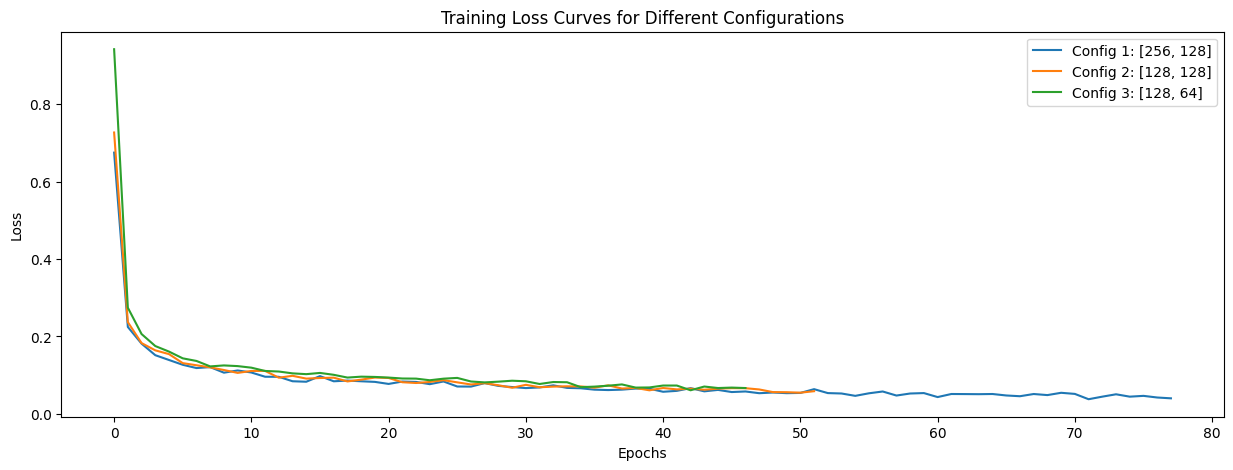

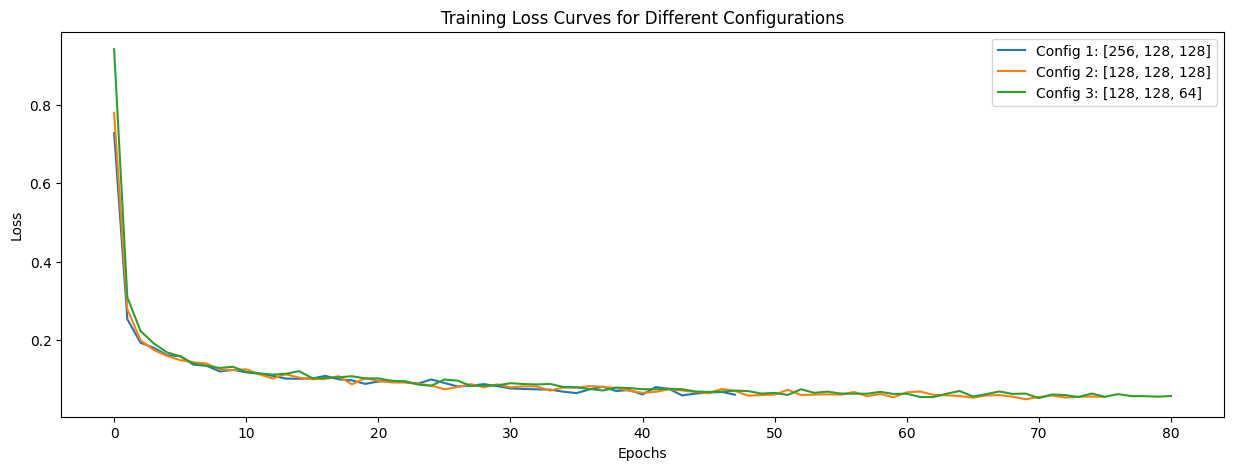

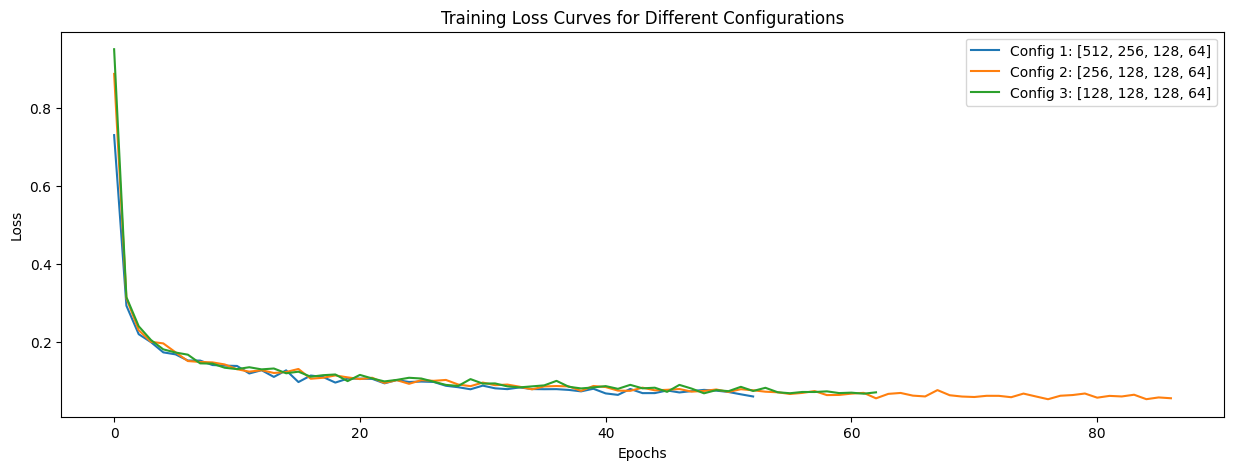

Model with configuration [256, 128]: Early Stopping Epoch = 77, Test Accuracy = 0.9733
Model with configuration [128, 128]: Early Stopping Epoch = 51, Test Accuracy = 0.9737
Model with configuration [128, 64]: Early Stopping Epoch = 46, Test Accuracy = 0.9754
Model with configuration [256, 128, 128]: Early Stopping Epoch = 47, Test Accuracy = 0.9787
Model with configuration [128, 128, 128]: Early Stopping Epoch = 75, Test Accuracy = 0.9771
Model with configuration [128, 128, 64]: Early Stopping Epoch = 80, Test Accuracy = 0.9771
Model with configuration [512, 256, 128, 64]: Early Stopping Epoch = 52, Test Accuracy = 0.9754
Model with configuration [256, 128, 128, 64]: Early Stopping Epoch = 86, Test Accuracy = 0.9767
Model with configuration [128, 128, 128, 64]: Early Stopping Epoch = 62, Test Accuracy = 0.9742


In [135]:
import matplotlib.pyplot as plt

NUM_CLASSES = 12
input_shape = (64,) 

model_configs = [
    [256, 128], [128, 128], [128, 64], 
    [256, 128, 128], [128, 128, 128], [128, 128, 64], 
    [512, 256, 128, 64], [256, 128, 128, 64], [128, 128, 128, 64] 
]



def create_model(layers_config):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(input_shape))
    for units in layers_config:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'))
    return model


def train_and_evaluate(model, x_train, y_train, x_val, y_val, x_test, y_test):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1)
    history = model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val), callbacks=[es_callback], verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return history, es_callback.stopped_epoch, test_acc


def plot_loss_curves(histories, model_configs):
    plt.figure(figsize=(15, 5))
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'Config {i+1}: {model_configs[i]}')
    plt.title('Training Loss Curves for Different Configurations')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def main(x_train, y_train, x_val, y_val, x_test, y_test):
    histories = []
    stopping_epochs = []
    test_accuracies = []
    models = [create_model(config) for config in model_configs]
    for model in models:
        history, stopped_epoch, test_acc = train_and_evaluate(model, x_train, y_train, x_val, y_val, x_test, y_test)
        histories.append(history)
        stopping_epochs.append(stopped_epoch)
        test_accuracies.append(test_acc)
    plot_loss_curves(histories[:3], model_configs[:3])
    plot_loss_curves(histories[3:6], model_configs[3:6])
    plot_loss_curves(histories[6:], model_configs[6:])
    for config, epoch, acc in zip(model_configs, stopping_epochs, test_accuracies):
        print(f"Model with configuration {config}: Early Stopping Epoch = {epoch}, Test Accuracy = {acc:.4f}")


main(X_train, y_train, X_val, y_val, X_test, y_test)


In [136]:
for config in model_configs:
    print(average_units(config))

192.0
128.0
96.0
170.66666666666666
128.0
106.66666666666667
240.0
144.0
112.0


# Confusion matrix

In [137]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

<a id="evaluation"></a>

### Evaluation 

75/75 [==============================] - 0s 2ms/step


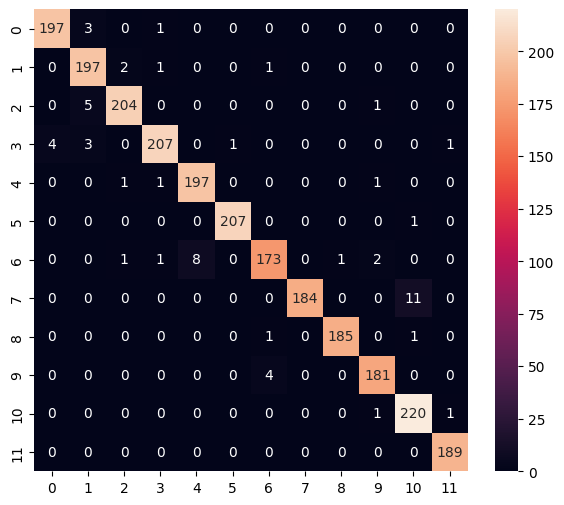

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       201
           1       0.95      0.98      0.96       201
           2       0.98      0.97      0.98       210
           3       0.98      0.96      0.97       216
           4       0.96      0.98      0.97       200
           5       1.00      1.00      1.00       208
           6       0.97      0.93      0.95       186
           7       1.00      0.94      0.97       195
           8       0.99      0.99      0.99       187
           9       0.97      0.98      0.98       185
          10       0.94      0.99      0.97       222
          11       0.99      1.00      0.99       189

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



In [138]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

## Convert to model for Tensorflow-Lite

In [139]:
# Save as a model dedicated to inference
# model.save(model_save_path, include_optimizer=False)

In [140]:
# # Transform model (quantization)
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_quantized_model = converter.convert()

# open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\renyi\AppData\Local\Temp\tmplgey3wfj\assets


INFO:tensorflow:Assets written to: C:\Users\renyi\AppData\Local\Temp\tmplgey3wfj\assets


321880

### Inference test

In [141]:
# interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
# interpreter.allocate_tensors()
# # Get I / O tensor
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

In [142]:
# interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [143]:
# np.array([X_test[0]])

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.98144783e-03, -2.23025344e-02,
        -6.88415999e-03, -1.77429337e-02, -4.67161685e-02,
        -1.12438109e-02, -2.39255875e-02, -6.48192242e-02,
        -1.62647236e-02, -3.07960026e-02, -7.62352794e-02,
        -1.95785016e-02,  3.75132959e-17, -6.53303191e-02,
        -4.71468054e-04,  2.75991624e-04, -7.58573189e-02,
        -9.61074326e-03, -3.19577032e-03, -5.69726638e-02,
        -1.42947678e-02, -2.59770849e-03, -5.04614040e-02,
        -1.66317876e-02,  1.11168632e-02, -6.28402531e-02,
        -1.64122332e-03,  1.04519129e-02, -6.97992146e-02,
        -1.06204376e-02,  4.95113898e-03, -4.94120605e-02,
        -1.10188648e-02,  4.78710653e-03, -4.57057171e-02,
        -9.86819528e-03,  2.06429958e-02, -5.75499795e-02,
        -4.91535058e-03,  2.00364944e-02, -6.24663867e-02,
        -1.36479540e-02,  1.37048271e-02, -4.45249192e-02,
        -9.57841892e-03,  1.24939857e-02, -4.03831378e-0

In [144]:
# %%time
# # Inference implementation
# interpreter.invoke()
# tflite_results = interpreter.get_tensor(output_details[0]['index'])

# print(np.squeeze(tflite_results))
# print(np.argmax(np.squeeze(tflite_results)))

[3.8008937e-05 9.5136464e-01 4.8044793e-02 2.7635990e-04 3.8734906e-05
 1.0750019e-05 1.6586839e-04 8.1270815e-07 2.1612443e-06 5.1920997e-05
 5.3772637e-06 5.2856905e-07]
1
CPU times: total: 0 ns
Wall time: 0 ns
